In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corona_cases = pd.read_csv('time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
corona_cases = corona_cases.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
corona_cases = corona_cases.fillna(0)
corona_cases.location[corona_cases.location == 'US'] = 'United States of America'
corona_cases = corona_cases.sort_values(['date', 'total_cases'])
corona_cases.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_cases
58,0,Afghanistan,33.0000,65.0000,2020-01-22,0
117,0,Albania,41.1533,20.1683,2020-01-22,0
176,0,Algeria,28.0339,1.6596,2020-01-22,0
235,0,Andorra,42.5063,1.5218,2020-01-22,0
294,0,Angola,-11.2027,17.8739,2020-01-22,0


In [3]:
countries = corona_cases[corona_cases.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': corona_cases[corona_cases.location == country].date.max(),
        'total_cases': sum(corona_cases.total_cases[(corona_cases.location == country) & (corona_cases.date == corona_cases[corona_cases.location == country].date.max())])
    }
    corona_cases = corona_cases.append(total, ignore_index=True)


corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 



In [4]:
death_dataset = pd.read_csv('time_series-ncov-Death.csv', parse_dates=['Date'], skiprows=[1])
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_deaths"})
death_dataset = death_dataset.fillna(0)
death_dataset.location[death_dataset.location == 'US'] = 'United States of America'
death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_deaths
58,0,Afghanistan,33.0000,65.0000,2020-01-22,0
117,0,Albania,41.1533,20.1683,2020-01-22,0
176,0,Algeria,28.0339,1.6596,2020-01-22,0
235,0,Andorra,42.5063,1.5218,2020-01-22,0
294,0,Angola,-11.2027,17.8739,2020-01-22,0


In [5]:
countries = death_dataset[death_dataset.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': death_dataset[death_dataset.location == country].date.max(),
        'total_deaths': sum(death_dataset.total_deaths[(death_dataset.location == country) & (death_dataset.date == death_dataset[death_dataset.location == country].date.max())])
    }
    death_dataset = death_dataset.append(total, ignore_index=True)


death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 


In [6]:
map_df = gpd.read_file('./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')


In [7]:
merged = map_df.set_index('SOVEREIGNT').join(death_dataset.set_index('location'))
merged = merged.fillna(0)
merged = merged[merged.ADMIN != 'Antarctica']

In [8]:
merged2 = map_df.set_index('SOVEREIGNT').join(corona_cases.set_index('location'))
merged2 = merged2.fillna(0)
merged2 = merged2[merged2.ADMIN != 'Antarctica']

## Corona Death rate

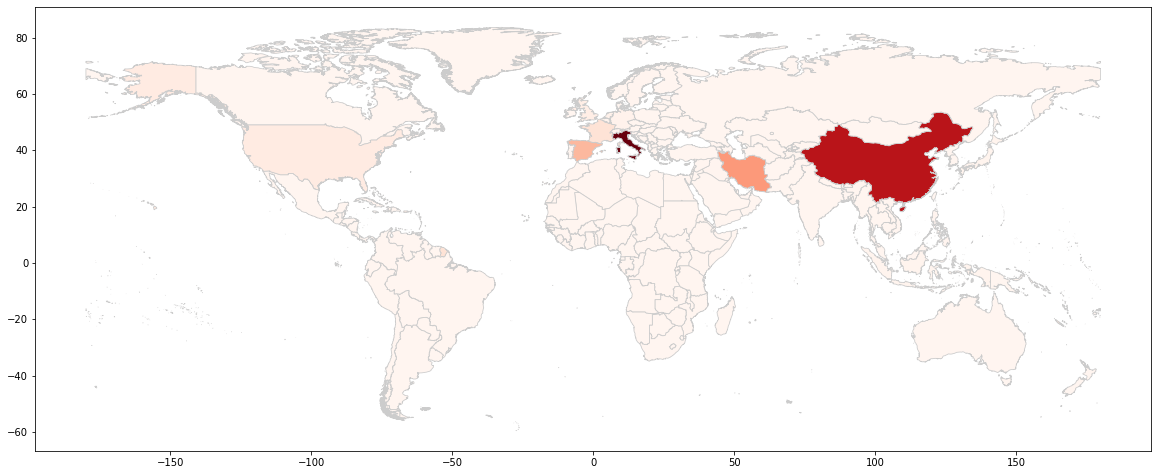

In [21]:
variable = 'total_deaths'
# set the range for the choropleth
vmin, vmax = 10, merged.total_deaths.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()
ax.axis('off')

# add a title
ax.set_title('Corona Death rate', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap.png', dpi=300)



## Corona Cases

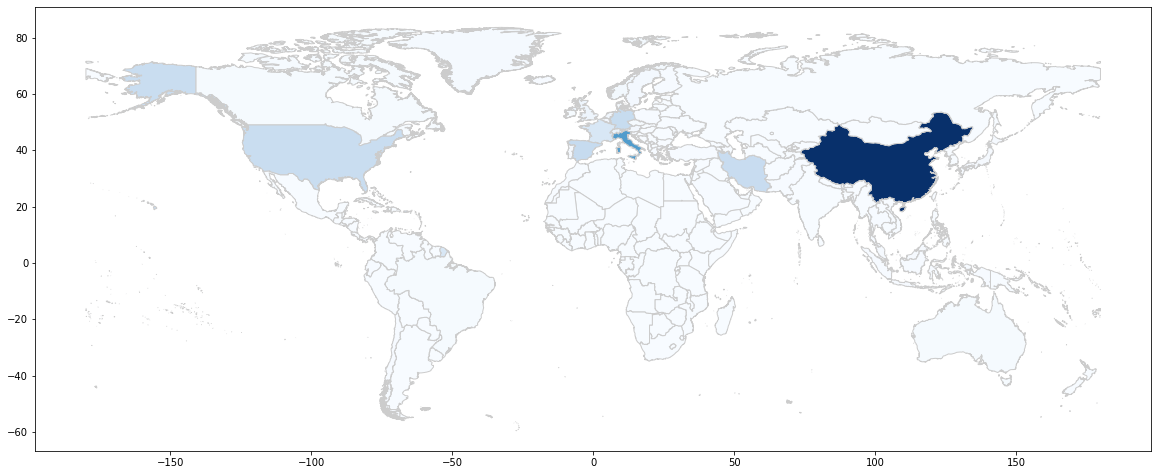

In [30]:
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 10, merged2.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

merged2.plot(column=variable, cmap='Blues', linewidth=1, ax=ax, edgecolor='0.8')
plt.show()
ax.axis('off')

# add a title
ax.set_title('Corona Cases', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap2.png', dpi=300)